In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [118]:
dataset = pd.read_excel("RAWLOT1.xlsx")
dataset.head()

,UHID,Patients Name,Age,Gender,RAMJA Result,AIIMS Result culture,E.coli,K. Pneumoniae,P.aurogenosa,A.baumnnii,P.mirabilis,S. aureus,E.faecalis,S. saprophyticus,Diagnosis,Abdominal pain,BurningMicturition,Urinating often,Vaginal irritation,Fatigue,Malaise,WeightLoss,Cough,Expectoration,HospitalStay,ICU Stay,Prognosis,Ventillator,Dialysis,BP
0,20220065432,Sahroj,33.0,F,Enterococcus faecalis,Enterococcus faecalis,NaN,NaN,-5.26086,-4.09794,-3.58480,-5.62819,-8.10731,NaN,UTI,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,0,Good,No,No,110/76
1,20240016182,Shyanu,70.0,F,NaN,NaN,-6.63325,-10.1276,-8.30086,-13.22480,-11.94120,-14.93870,-13.64090,NaN,Vaginal Hysterectomy,Yes,No,no,no,no,no,no,no,no,0,0,Good,No,No,112/76
2,20230125389,Saloni,19.0,F,E.Coli. and K.pne,E.coli,-15.30980,-10.0174,-9.09993,-8.30414,-5.06676,-8.77797,-5.42121,NaN,UTI,No,Yes,No,No,No,No,No,No,No,0,0,Good,No,No,100/60
3,20180022685,Ravita,34.0,F,P. mirabilis,CONTAMINATION,-7.70704,-8.0891,-4.79176,-8.63416,-11.84570,-9.90339,-9.31657,NaN,UTI,No,Yes,No,Yes,No,No,No,No,No,0,0,Good,No,No,105/80
4,20201415102,Jyoti,28.0,F,NaN,NaN,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,UTI,No,No,No,No,No,No,No,No,No,0,0,Good,No,No,115/100


In [119]:
dataset.shape

(125, 30)

In [120]:
data = pd.read_excel("RAWLOT1.xlsx")
data = dataset[['UHID','RAMJA Result','AIIMS Result culture']]
data.columns = ['UHID','RAMJA','AIIMS']
data.head()

,UHID,RAMJA,AIIMS
0,20220065432,Enterococcus faecalis,Enterococcus faecalis
1,20240016182,NaN,NaN
2,20230125389,E.Coli. and K.pne,E.coli
3,20180022685,P. mirabilis,CONTAMINATION
4,20201415102,NaN,NaN


In [121]:
#df_nan.to_excel('compareddata.xlsx', sheet_name='Null data')

In [6]:
import re
def cleanup(text):
    text = str(text)
    text = text.upper()
    text = text.replace(".", " ")
    text = text.replace(" AND", ",")
    text = text.replace(" &", ",")
    text = text.replace("POLYMICROBIAL (", "")
    text = text.replace("AUROGENOSA", "AERUGINOSA")
    text = re.sub(r'\s+', ' ', text)  # Use re.sub for regular expression replacement
    text = text.strip()
    return text


In [122]:
bacteriatypes = {
    "COLI" : 'Escherichia coli', 
    "PNE" : 'Klebsiella pneumoniae',
    "AERUGI" : 'Pseudomonas aeruginosa',
    "BAUM" : 'Acinetobacter baumannii', 
    "MIRABIL" : 'Proteus mirabilis', 
    "FAECALI" : 'Enterococcus faecalis', 
    "AUREUS" : 'Staphylococcus aureus', 
    "SAPROPHY" : 'Staphylococcus saprophyticus',
    "STERI" : 'Sterile',
    "CONTA" : 'Contamination',
    "NAN" : 'NAN'
}

In [123]:
data['cleanRAMJA'] = data['RAMJA'].apply(cleanup)
data['cleanAIIMS'] = data['AIIMS'].apply(cleanup)

C:\Users\neelesh\AppData\Local\Temp\ipykernel_12104\4174382849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleanRAMJA'] = data['RAMJA'].apply(cleanup)
C:\Users\neelesh\AppData\Local\Temp\ipykernel_12104\4174382849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleanAIIMS'] = data['AIIMS'].apply(cleanup)


In [124]:
#..FUNCTION TO CHECK IF TEST STRINGS(S1 OR S2) PRESENT IN MAIN STRING 
def check(mainstring, s1, s2):
    if (mainstring.count(s1) > 0 or mainstring.count(s2) > 0):
        #print("YES")
        return(1)
    else:
        #print("NO")
        return(0)

In [125]:
data.shape

(125, 5)

### RAMJA Analysis

In [126]:
df_R = data.copy()
genus = ["ESCHER","KLEBS","PSEUDO","ACINE","PROT","ENTER","AURE","SAPRO","STERI","CONTA","NAN"]
species = ["COLI", "PNE", "AERUGI", "BAUM", "MIRABIL", "FAECALI", "AUREUS", "SAPROPHY", "STERI","CONTA","NAN"]
for s1, s2 in zip(genus,species):
    df_R[s2] = df_R['cleanRAMJA'].apply(lambda x: check(x, s1, s2))

df_R.rename(columns=bacteriatypes, inplace=True) #change column names
# add suffix _R to column names
# columns_to_modify = ['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Sterile','Contamination','NAN']
# data.rename(columns={col: f"{col}_R" for col in columns_to_modify}, inplace=True)

In [127]:
df_R.shape

(125, 16)

In [128]:
#....add a column named 'Others' contain values other than assigend catagories
df_R_temp = df_R[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Sterile','Contamination','NAN']]
df_R_temp = df_R_temp == 0
df_R_temp['Others_R'] = df_R_temp.all(axis=1)
df_R['Others_R'] = df_R_temp['Others_R'].astype(int)
df_R.shape

(125, 17)

In [129]:
df_R.head()

,UHID,RAMJA,AIIMS,cleanRAMJA,cleanAIIMS,Escherichia coli,Klebsiella pneumoniae,Pseudomonas aeruginosa,Acinetobacter baumannii,Proteus mirabilis,Enterococcus faecalis,Staphylococcus aureus,Staphylococcus saprophyticus,Sterile,Contamination,NAN,Others_R
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,ENTEROCOCCUS FAECALIS,ENTEROCOCCUS FAECALIS,0,0,0,0,0,1,0,0,0,0,0,0
1,20240016182,NaN,NaN,NAN,NAN,0,0,0,0,0,0,0,0,0,0,1,0
2,20230125389,E.Coli. and K.pne,E.coli,"E COLI , K PNE",E COLI,1,1,0,0,0,0,0,0,0,0,0,0
3,20180022685,P. mirabilis,CONTAMINATION,P MIRABILIS,CONTAMINATION,0,0,0,0,1,0,0,0,0,0,0,0
4,20201415102,NaN,NaN,NAN,NAN,0,0,0,0,0,0,0,0,0,0,1,0


In [131]:
#...Get infections positive column in RAMJA
df_R_temp  = df_R[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Others_R']]
df_R_temp = df_R_temp == 1
df_R_temp['Infection_R'] = df_R_temp.any(axis=1)
df_R['Infection_R'] = df_R_temp['Infection_R'].astype(int)
df_R.shape

(125, 18)

In [132]:
#....Drop rows containing NaN in Ramaj column results
df_NonNaN_R = df_R.dropna(subset=['RAMJA'])
df_NonNaN_R.shape
df_R_clean = df_NonNaN_R
df_R_clean.shape

(122, 18)

In [17]:
#display(df_NonNaN_R)

In [18]:
#...Remove contaminated sample and Others samples
# df_R_clean = df_NonNaN_R[(df_NonNaN_R['Contamination'] == 0) & (df_NonNaN_R['Others_R'] == 0)]
# df_R_clean.shape

In [133]:
#....After Dopping NaN these two set of values should be equal
print(df_R_clean['Infection_R'].value_counts())
print(df_R_clean['Sterile'].value_counts())

1    70
0    52
Name: Infection_R, dtype: int64
0    70
1    52
Name: Sterile, dtype: int64


In [20]:
#df_R.to_excel("temp1.xlsx")

### AIIMS Analysis

In [134]:
data.shape

(125, 5)

In [135]:
df_A = data.copy()
genus = ["ESCHER","KLEBS","PSEUDO","ACINE","PROT","ENTER","AURE","SAPRO","STERI","CONTA","NAN"]
species = ["COLI", "PNE", "AERUGI", "BAUM", "MIRABIL", "FAECALI", "AUREUS", "SAPROPHY", "STERI","CONTA","NAN"]
for s1, s2 in zip(genus,species):
    df_A[s2] = df_A['cleanAIIMS'].apply(lambda x: check(x, s1, s2))

df_A.rename(columns=bacteriatypes, inplace=True) #change column names

# add suffix _R to column names
#columns_to_modify = ['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Sterile','Contamination','NAN']
#data.rename(columns={col: f"{col}_A" for col in columns_to_modify}, inplace=True)

In [136]:
df_A.shape

(125, 16)

In [137]:
#....add a column named 'Others' contain values other than assigend catagories
df_A_temp = df_A[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Sterile','Contamination','NAN']]
df_A_temp = df_A_temp == 0
df_A_temp['Others_A'] = df_A_temp.all(axis=1)
df_A['Others_A'] = df_A_temp['Others_A'].astype(int)
df_A.shape

(125, 17)

In [138]:
df_A.head()

,UHID,RAMJA,AIIMS,cleanRAMJA,cleanAIIMS,Escherichia coli,Klebsiella pneumoniae,Pseudomonas aeruginosa,Acinetobacter baumannii,Proteus mirabilis,Enterococcus faecalis,Staphylococcus aureus,Staphylococcus saprophyticus,Sterile,Contamination,NAN,Others_A
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,ENTEROCOCCUS FAECALIS,ENTEROCOCCUS FAECALIS,0,0,0,0,0,1,0,0,0,0,0,0
1,20240016182,NaN,NaN,NAN,NAN,0,0,0,0,0,0,0,0,0,0,1,0
2,20230125389,E.Coli. and K.pne,E.coli,"E COLI , K PNE",E COLI,1,0,0,0,0,0,0,0,0,0,0,0
3,20180022685,P. mirabilis,CONTAMINATION,P MIRABILIS,CONTAMINATION,0,0,0,0,0,0,0,0,0,1,0,0
4,20201415102,NaN,NaN,NAN,NAN,0,0,0,0,0,0,0,0,0,0,1,0


In [160]:
#...Get infections positive (any infection) in AIIMS
df_A_temp  = df_A[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Others_A']]
df_A_temp = df_A_temp == 1
df_A_temp['Infection_A'] = df_A_temp.any(axis=1)
df_A['Infection_A'] = df_A_temp['Infection_A'].astype(int)
df_A.shape


(125, 18)

In [161]:
#...dataset containing removed NaN based on AIIMS
df_NonNaN_A = df_A.dropna(subset=['AIIMS'])
df_A_clean = df_NonNaN_A

In [28]:
#...Remove contaminated sample and Others samples 
# df_A_clean = df_NonNaN_A[(df_NonNaN_A['Contamination'] == 0) & (df_NonNaN_A['Others_A'] == 0)]
# df_A_clean.shape

In [162]:
#....After Dopping NaN these two set of values should be equal
print(df_A_clean['Infection_A'].value_counts())
print(df_A_clean['Sterile'].value_counts())

0    56
1    53
Name: Infection_A, dtype: int64
1    56
0    53
Name: Sterile, dtype: int64


In [150]:
#df_NonNaN_A.to_excel("temp1.xlsx")

In [163]:
#......
df_R_infec = df_R_clean[df_R_clean['Infection_R'] == 1]
df_R_infec = df_R_infec[['UHID','RAMJA','AIIMS']]
df_R_infec.shape

(70, 3)

In [164]:
df_A_infec = df_A_clean[df_A_clean['Infection_A'] == 1]
df_A_infec = df_A_infec[['UHID','RAMJA','AIIMS']]
df_A_infec.shape

(53, 3)

### Concordance analysis

In [153]:
#...Concordance: Get same type of infections in both RAMJA and AIIMS
df_R_temp1  = df_R[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus']]
df_A_temp1  = df_A[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus']]
df_C_temp1 = df_R_temp1 & df_A_temp1
df_C_temp1['Infection_C'] = df_C_temp1.any(axis=1)
df_C = data[['UHID','RAMJA','AIIMS']]
df_C['concordance'] = df_C_temp1['Infection_C'].astype(int)
df_C.head()

C:\Users\neelesh\AppData\Local\Temp\ipykernel_12104\3825133095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_C['concordance'] = df_C_temp1['Infection_C'].astype(int)


,UHID,RAMJA,AIIMS,concordance
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,1
1,20240016182,NaN,NaN,0
2,20230125389,E.Coli. and K.pne,E.coli,1
3,20180022685,P. mirabilis,CONTAMINATION,0
4,20201415102,NaN,NaN,0


In [154]:
df_C.shape

(125, 4)

In [155]:
df_C['concordance'].value_counts()

0    100
1     25
Name: concordance, dtype: int64

In [157]:
df_NonNaN_C = df_C.dropna(subset=['RAMJA','AIIMS'])
df_NonNaN_C.shape

(109, 4)

### common clean samples

In [158]:
df_R_tempc = df_R_clean[['UHID','RAMJA','AIIMS', 'Infection_R']]
df_R_tempc.shape

(122, 4)

In [159]:
df_A_tempc = df_A_clean[['UHID','Infection_A']]
df_A_tempc.shape

(109, 2)

In [40]:
#..clean datset having common samples with No Nan, No contamination, No Others
df_C_clean = pd.merge(df_R_tempc,df_A_tempc,how='inner', on='UHID')
df_C_clean.shape

(109, 5)

In [41]:
df_C_clean.head()

,UHID,RAMJA,AIIMS,Infection_R,Infection_A
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,1,1
1,20230125389,E.Coli. and K.pne,E.coli,1,1
2,20180022685,P. mirabilis,CONTAMINATION,1,1
3,20240012395,"Polymicrobial (E.coli, A. baumannii, P.mirabil...",E.coli,1,1
4,20220166372,"E.coli, Pseudomonas, P.mirabilis, E.Faecalis, ...",E.coli & Pseudomnas,1,1


#### Confusion matrix

In [42]:
from sklearn.metrics import confusion_matrix

y_true = df_C_clean['Infection_A']
y_pred = df_C_clean['Infection_R']

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[38 18]
 [ 7 46]]


In [43]:
sum(sum(cm))

109

In [44]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn,fp,fn,tp)

(38, 18, 7, 46)

In [45]:
t_cm = np.array([tp, fp, fn, tn]).reshape(2,2)
t_cm

array([[46, 18],
       [ 7, 38]], dtype=int64)

In [46]:
df_cm =pd.DataFrame(t_cm,index=['RAMJA Positive','RAMJA Negative'], columns= ['AIIMS Positive','AIIMS Negative'])
df_cm

,AIIMS Positive,AIIMS Negative
RAMJA Positive,46,18
RAMJA Negative,7,38


#### Scores

In [47]:
def scores(y_test, y_pred):
        #y_pred = self.fit(x_train, x_test, y_train)
        from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
        
        cm = confusion_matrix(y_test,y_pred)
        
        # Compute confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
                
        #.....................Accuracy......................#
        #accur = accuracy_score(y_test,y_pred)
        accur = (tp + tn)/(tp+tn+fp+fn)
        
       #.....................Senstivity.....................#
        sens = tp/(tp + fn)

        #.....................Specificity...................#
        spec = tn / (tn + fp)

        #..........Positive predictive value (PPV)...........#
        PPV = tp/(tp + fp)

        #..........negative predictive value (NPV)...........#
        NPV = tn/(tn + fn)
        
        #..........Positive Likelihood ratio (PLR)...........#
        PLR = sens/(1-spec)

        #..........Negative Likelihood ratio (NLR)...........#
        NLR = (1-sens)/spec

        errorList = np.array([accur, sens, spec, PPV, NPV, PLR, NLR])
        return(errorList)

In [48]:
scores(y_true,y_pred)
scoreid = ['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'PLR', 'NLR']
df_score = pd.DataFrame(scores(y_true,y_pred),index=scoreid, columns= ['LOT1'])
df_score = round(df_score,4)
df_score

,LOT1
Accuracy,0.7706
Sensitivity,0.8679
Specificity,0.6786
PPV,0.7188
NPV,0.8444
PLR,2.7002
NLR,0.1946


In [49]:
""" print("#..........RAMJA Details..........#")
#......VAlies for both RAMJA and AIIMS
print("Total samples: ", data.shape[0])

#...Values for RAMJA
print("Null Samples RAMJA: ",data['RAMJA'].isnull().sum(axis=0))
print("Non-Null RAMJA: ", data['RAMJA'].count())

#...VAlues for RAMJA after dropping NaN
print("Contaminated Samples RAMJA: ", df_NonNaN_R['Contamination'].sum())
print("Other RAMJA: ", df_NonNaN_R['Others_R'].sum())
print("Positive RAMJA: ", df_NonNaN_R['Infection_R'].sum())
print("Negative RAMJA: ", df_NonNaN_R['Sterile'].sum())

print("#..........AIIMS Details..........#")
#...Values for AIIMS
print("Total samples: ", data.shape[0])
print("Null Samples AIIMS: ",data['AIIMS'].isnull().sum(axis=0))
print("Non-Null AIIMS: ", data['AIIMS'].count())

#...VAlues for RAMJA after dropping NaN
print("Contaminated Samples AIIMS: ", df_NonNaN_A['Contamination'].sum())
print("Other AIIMS: ", df_NonNaN_A['Others_A'].sum())
print("Positive AIIMS: ", df_NonNaN_A['Infection_A'].sum())
print("Negative AIIMS: ", df_NonNaN_A['Sterile'].sum())
 """

' print("#..........RAMJA Details..........#")\n#......VAlies for both RAMJA and AIIMS\nprint("Total samples: ", data.shape[0])\n\n#...Values for RAMJA\nprint("Null Samples RAMJA: ",data[\'RAMJA\'].isnull().sum(axis=0))\nprint("Non-Null RAMJA: ", data[\'RAMJA\'].count())\n\n#...VAlues for RAMJA after dropping NaN\nprint("Contaminated Samples RAMJA: ", df_NonNaN_R[\'Contamination\'].sum())\nprint("Other RAMJA: ", df_NonNaN_R[\'Others_R\'].sum())\nprint("Positive RAMJA: ", df_NonNaN_R[\'Infection_R\'].sum())\nprint("Negative RAMJA: ", df_NonNaN_R[\'Sterile\'].sum())\n\nprint("#..........AIIMS Details..........#")\n#...Values for AIIMS\nprint("Total samples: ", data.shape[0])\nprint("Null Samples AIIMS: ",data[\'AIIMS\'].isnull().sum(axis=0))\nprint("Non-Null AIIMS: ", data[\'AIIMS\'].count())\n\n#...VAlues for RAMJA after dropping NaN\nprint("Contaminated Samples AIIMS: ", df_NonNaN_A[\'Contamination\'].sum())\nprint("Other AIIMS: ", df_NonNaN_A[\'Others_A\'].sum())\nprint("Positive AIIM

#### Samples detail

In [50]:
samplesDetail = {
    "Total Samples": [data.shape[0],data.shape[0]],
    "Blank Results": [data['RAMJA'].isnull().sum(axis=0), data['AIIMS'].isnull().sum(axis=0)],
    "Non-Blank Results": [data['RAMJA'].count(),data['AIIMS'].count()],
    "Contaminated Samples": [df_NonNaN_R['Contamination'].sum(),df_NonNaN_A['Contamination'].sum()],
    "Others": [df_NonNaN_R['Others_R'].sum(),df_NonNaN_A['Others_A'].sum()],
    "Common samples":  [df_NonNaN_C.shape[0], df_NonNaN_C.shape[0]],
    #"Useful Samples":[df_R_clean.shape[0], df_A_clean.shape[0]],
    "Positive": [df_NonNaN_R['Infection_R'].sum(),df_NonNaN_A['Infection_A'].sum()],
    "Negative": [df_NonNaN_R['Sterile'].sum(),df_NonNaN_A['Sterile'].sum()],
    "Common Positive": [tp,tp],
    "Concordance [Common bacteria]": [df_C['concordance'].sum(),df_C['concordance'].sum()],
    "Common Negative": [tn,tn]
    
}

In [51]:
df_samplesDetail = pd.DataFrame(samplesDetail, index=['RAMJA','AIIMS']).T
df_samplesDetail

,RAMJA,AIIMS
Total Samples,125,125
Blank Results,3,16
Non-Blank Results,122,109
Contaminated Samples,0,14
Others,0,9
Common samples,109,109
Positive,70,53
Negative,52,56
Common Positive,46,46
Concordance [Common bacteria],25,25


#### Export matrices to excel

In [107]:
# Write the DataFrames to an Excel file
with pd.ExcelWriter('matrices2.xlsx') as writer:
    df_samplesDetail.to_excel(writer, sheet_name='SamplesDetail', index=True)
    df_cm.to_excel(writer, sheet_name='ConfusionMatrix', index=True)
    df_score.to_excel(writer, sheet_name='Scores', index=True)
    


#### Sort the required dataset and export to excel

In [52]:
df_A_conta = df_NonNaN_A[df_NonNaN_A['Contamination'] ==1][['UHID', 'RAMJA', 'AIIMS']]
df_A_conta.shape

(14, 3)

In [53]:
df_A_others = df_NonNaN_A[df_NonNaN_A['Others_A'] ==1][['UHID', 'RAMJA', 'AIIMS']]
df_A_others.shape

(9, 3)

In [54]:
display(df_A_others)

,UHID,RAMJA,AIIMS
26,20240019044,E.coli & Klebsiella pneumonia,Candida spp.
70,20240034567,"A. baumannii, P.mirabilis, E. Faecalis",Insignificant growth
90,20240046542,P.Aurogenosa,Acintobacter spp.
96,20240074281,Sterile,Commensal Flora
104,20240028527,Sterile,Insignificant growth of colonizer
107,20240087671,"S.Aureus ,Saprohutics, and Mirababilis",Insignificant growth gram positive cocci
108,20230121277,E. coli and A.Baumini,Insignificant Gram negative bacilli
109,20240094465,"A. baumanni, P mirabilis, S saprophyticus",Candida spp. and Insignificant gram negative b...
110,20230156801,S.Saprophytics,Insignificant gram negative bacilli


In [55]:
#...Both positives
df_Pos_C = df_C_clean[(df_C_clean['Infection_R'] == 1) & (df_C_clean['Infection_A'] == 1)][['UHID', 'RAMJA', 'AIIMS']]
df_Pos_C.shape

(46, 3)

In [56]:
#...Both Negatives
df_Neg_C = df_C_clean[(df_C_clean['Infection_R'] == 0) & (df_C_clean['Infection_A']==0)][['UHID', 'RAMJA', 'AIIMS']]
df_Neg_C.shape

(38, 3)

In [57]:
#...Common type of infection
df_concordance = df_C[df_C['concordance'] == 1][['UHID','RAMJA','AIIMS']]
df_concordance.shape

(25, 3)

In [56]:
# Write the DataFrames to an Excel file
with pd.ExcelWriter('sorteddata2.xlsx') as writer:
    df_A_others.to_excel(writer, sheet_name='Undefined Samples_A', index=False)
    df_A_conta.to_excel(writer, sheet_name='Contaminated Samples_A', index=False)
    df_Pos_C.to_excel(writer, sheet_name='Common Positives', index=False)
    df_concordance.to_excel(writer, sheet_name='Concordance', index=False)
    df_Neg_C.to_excel(writer, sheet_name='Common Negatives', index=False)

<Axes: xlabel='Infection_A', ylabel='HR'>

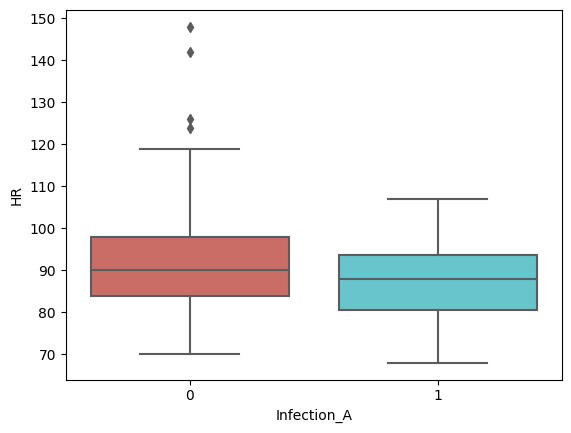

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Infection_A', y='HR', data=df_C_sym, palette='hls')

<Axes: xlabel='Infection_A', ylabel='Fever'>

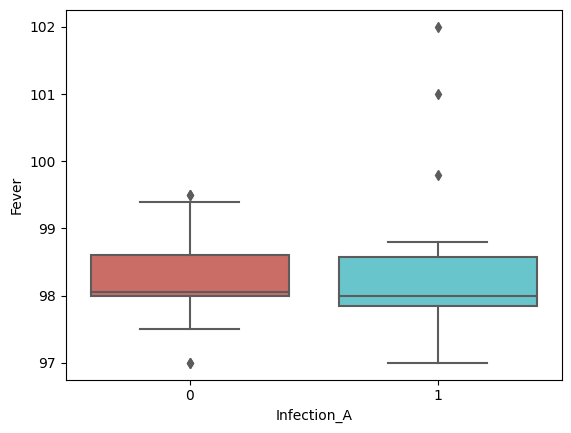

In [121]:
sns.boxplot(x='Infection_A', y='Fever', data=df_C_sym, palette='hls')

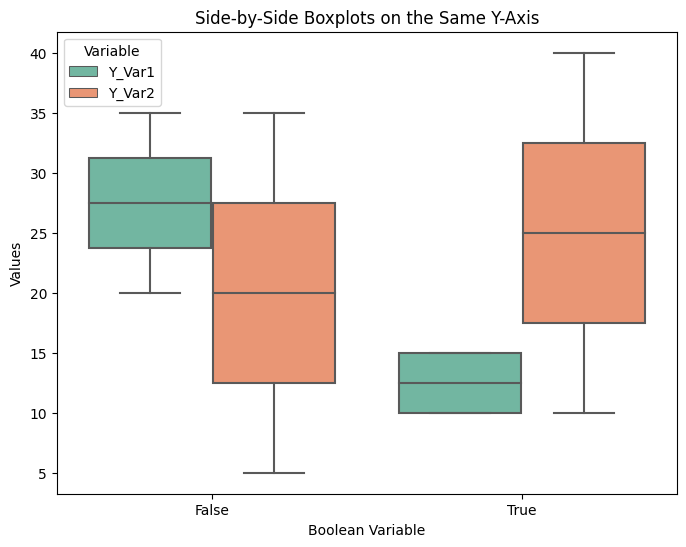

In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'Boolean_Var': [True, False, True, False, True, False, True, False],
        'Y_Var1': [10, 20, 15, 25, 10, 30, 15, 35],
        'Y_Var2': [40, 35, 30, 25, 20, 15, 10, 5]}
df = pd.DataFrame(data)

# Reshape the DataFrame to a long format for plotting
df_melted = pd.melt(df, id_vars=['Boolean_Var'], value_vars=['Y_Var1', 'Y_Var2'], 
                    var_name='Variable', value_name='Value')

# Plotting the side-by-side boxplots on the same y-axis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Boolean_Var', y='Value', hue='Variable', data=df_melted, palette='Set2')

# Customize plot
plt.title("Side-by-Side Boxplots on the Same Y-Axis")
plt.ylabel("Values")
plt.xlabel("Boolean Variable")
plt.show()


<Axes: xlabel='Infection_A', ylabel='BP_Dia'>

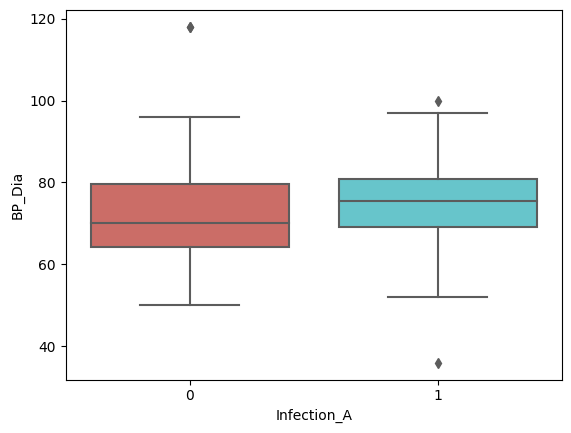

In [135]:
sns.boxplot(x='Infection_A', y='BP_Dia', data=df_C_sym, palette='hls')

### Symptoms analysis

In [62]:
dataset.shape

(125, 30)

In [63]:
data_sym = dataset[['UHID','Diagnosis','Abdominal pain', 'BurningMicturition','Urinating often','Vaginal irritation']]

In [64]:
data_sym.head()

,UHID,Diagnosis,Abdominal pain,BurningMicturition,Urinating often,Vaginal irritation
0,20220065432,UTI,Yes,Yes,Yes,No
1,20240016182,Vaginal Hysterectomy,Yes,No,no,no
2,20230125389,UTI,No,Yes,No,No
3,20180022685,UTI,No,Yes,No,Yes
4,20201415102,UTI,No,No,No,No


In [65]:
data_sym.shape

(125, 6)

#### Data cleaning for correlation of catagorical matrix

In [66]:
data_sym = data_sym.dropna()
data_sym.shape

(103, 6)

In [67]:
# Define undesired symbols (as a regex pattern)
undesired_symbols = '[-_@#$]'

# Create a mask for rows that contain undesired symbols in any column
mask = data_sym.astype(str).apply(lambda col: col.str.contains(undesired_symbols, regex=True, na=False))

# Drop rows where any column contains undesired symbols
data_sym = data_sym[~mask.any(axis=1)]
data_sym.shape

(102, 6)

In [68]:
data_sym.head()

,UHID,Diagnosis,Abdominal pain,BurningMicturition,Urinating often,Vaginal irritation
0,20220065432,UTI,Yes,Yes,Yes,No
1,20240016182,Vaginal Hysterectomy,Yes,No,no,no
2,20230125389,UTI,No,Yes,No,No
3,20180022685,UTI,No,Yes,No,Yes
4,20201415102,UTI,No,No,No,No


In [69]:

data_sym = data_sym.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
data_sym['Diagnosis'] = data_sym['Diagnosis'].map(lambda x: 'YES' if x == 'UTI' else 'NO')
data_sym.shape

(102, 6)

In [204]:
#display(data_sym)

In [70]:
# Select the relevant columns
columns_to_map = ['Diagnosis', 'Abdominal pain', 'BurningMicturition', 'Urinating often', 'Vaginal irritation']

# Apply the mapping to the selected columns
data_sym[columns_to_map] = data_sym[columns_to_map].applymap(lambda x: 1 if x == 'YES' else 0)
data_sym.shape

(102, 6)

In [207]:
#display(data_sym)

In [71]:
data_sym.head()

,UHID,Diagnosis,Abdominal pain,BurningMicturition,Urinating often,Vaginal irritation
0,20220065432,1,1,1,1,0
1,20240016182,0,1,0,0,0
2,20230125389,1,0,1,0,0
3,20180022685,1,0,1,0,1
4,20201415102,1,0,0,0,0


In [72]:
#df_sym = pd.merge(data_sym,df_R_clean,how='inner',on='UHID')
df_sym = pd.merge(df_C_clean,data_sym,how='inner', on='UHID')
df_sym = df_sym[['UHID','Infection_R','Infection_A','Diagnosis', 'Abdominal pain', 'BurningMicturition', 'Urinating often', 'Vaginal irritation']]

In [81]:
#df_sym['Abdominal pain']

In [73]:
df_sym.head()

,UHID,Infection_R,Infection_A,Diagnosis,Abdominal pain,BurningMicturition,Urinating often,Vaginal irritation
0,20220065432,1,1,1,1,1,1,0
1,20230125389,1,1,1,0,1,0,0
2,20180022685,1,1,1,0,1,0,1
3,20240012395,1,1,1,0,0,0,1
4,20220166372,1,1,1,0,1,1,0


In [74]:
df_sym.dtypes

UHID                  int64
Infection_R           int32
Infection_A           int32
Diagnosis             int64
Abdominal pain        int64
BurningMicturition    int64
Urinating often       int64
Vaginal irritation    int64
dtype: object

In [75]:
df_sym = df_sym.apply(lambda col: col.astype('category') if col.nunique() < 3 else col)


In [76]:
df_sym = df_sym.drop('Diagnosis',axis=1)

In [77]:
df_sym.dtypes

UHID                     int64
Infection_R           category
Infection_A           category
Abdominal pain        category
BurningMicturition    category
Urinating often       category
Vaginal irritation    category
dtype: object

### Corrrelation of categorical variables

In [104]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(index=df_sym['Infection_A'], columns=df_sym['Vaginal irritation'])
cross_tab

Vaginal irritation,0,1
Infection_A,,
0,40,3
1,29,15


In [105]:
# defining the table
stat, p, dof, expected = chi2_contingency(cross_tab,)
print("p-value is " + str(p))
print("dof is " + str(dof))
(stat, p, dof, expected)

p-value is 0.004279884071823994
dof is 1


(8.161081556209208,
 0.004279884071823994,
 1,
 array([[34.10344828,  8.89655172],
        [34.89655172,  9.10344828]]))

In [80]:
def is_correlated(x,y):
    ct = pd.crosstab(index=df_sym[x], columns=df_sym[y])
    chi_sq_result = chi2_contingency(ct,)
    p,x = chi_sq_result[1], "Correlated" if chi_sq_result[1] < 0.05 else 'Not correlated'
    return p, x
    

In [81]:
is_correlated('Infection_R', 'Urinating often')

(0.034511026404539555, 'Correlated')

In [98]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v

def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(7,7))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("CramerV Correlation Values")
    plt.show()
       
#plot_cramer(df)

In [114]:
def probV (label,x):
    confusion_matrix = pd.crosstab(label, x)
    pb = chi2_contingency(confusion_matrix)[1]
    return pb

def plot_prob(df):
    prob = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                pb = probV(df[column_of_interest],df[columns[j]])
                prob.loc[column_of_interest,columns[j]] = pb
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = pb
            prob.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(10,10))
    sns.heatmap(prob,annot=True,fmt='.4f')

    plt.title("Cross Chi-sqr probability")
    plt.show()
       
#plot_prob(df)

In [84]:
#df_sym.to_excel("temp1.xlsx")

In [95]:
df_sym_corr = df_sym.iloc[:,1:]
df_sym_corr.rename(columns={'Infection_R':'RAMJA', 'Infection_A':'AIIMS'}, inplace=True)
df_sym_corr.head()

,RAMJA,AIIMS,Abdominal pain,BurningMicturition,Urinating often,Vaginal irritation
0,1,1,1,1,1,0
1,1,1,0,1,0,0
2,1,1,0,1,0,1
3,1,1,0,0,0,1
4,1,1,0,1,1,0


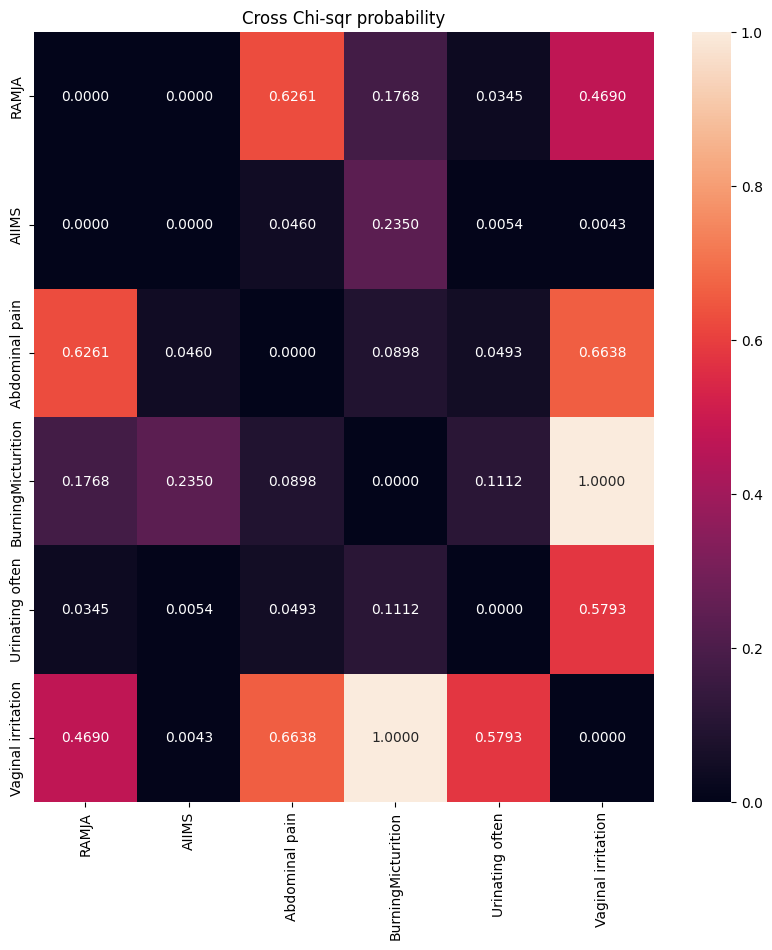

In [115]:
plot_prob(df_sym_corr)

Else condition Met:  0.9752984037440119
Else condition Met:  0.4733605897557214
Else condition Met:  0.0
Else condition Met:  0.09724180599471156
Else condition Met:  0.20052389515988858
Else condition Met:  0.0
Else condition Met:  0.4733605897557214
Else condition Met:  0.9767347469235226
Else condition Met:  0.18586555344052905
Else condition Met:  0.06808383142383438
Else condition Met:  0.2794954661845441
Else condition Met:  0.2883477480012911
Else condition Met:  0.0
Else condition Met:  0.18586555344052905
Else condition Met:  0.9569243834835662
Else condition Met:  0.1473151340758614
Else condition Met:  0.1821223687568199
Else condition Met:  0.0
Else condition Met:  0.09724180599471156
Else condition Met:  0.06808383142383438
Else condition Met:  0.1473151340758614
Else condition Met:  0.9766607218073038
Else condition Met:  0.13320040149780654
Else condition Met:  0.0
Else condition Met:  0.20052389515988858
Else condition Met:  0.2794954661845441
Else condition Met:  0.182

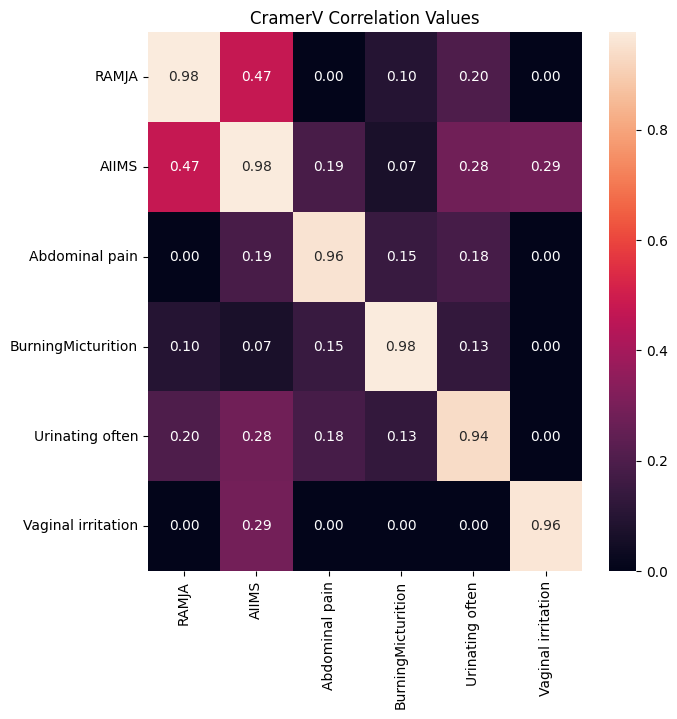

In [99]:
plot_cramer(df_sym_corr)

In [106]:
df_sym_corr.head()

,RAMJA,AIIMS,Abdominal pain,BurningMicturition,Urinating often,Vaginal irritation
0,1,1,1,1,1,0
1,1,1,0,1,0,0
2,1,1,0,1,0,1
3,1,1,0,0,0,1
4,1,1,0,1,1,0


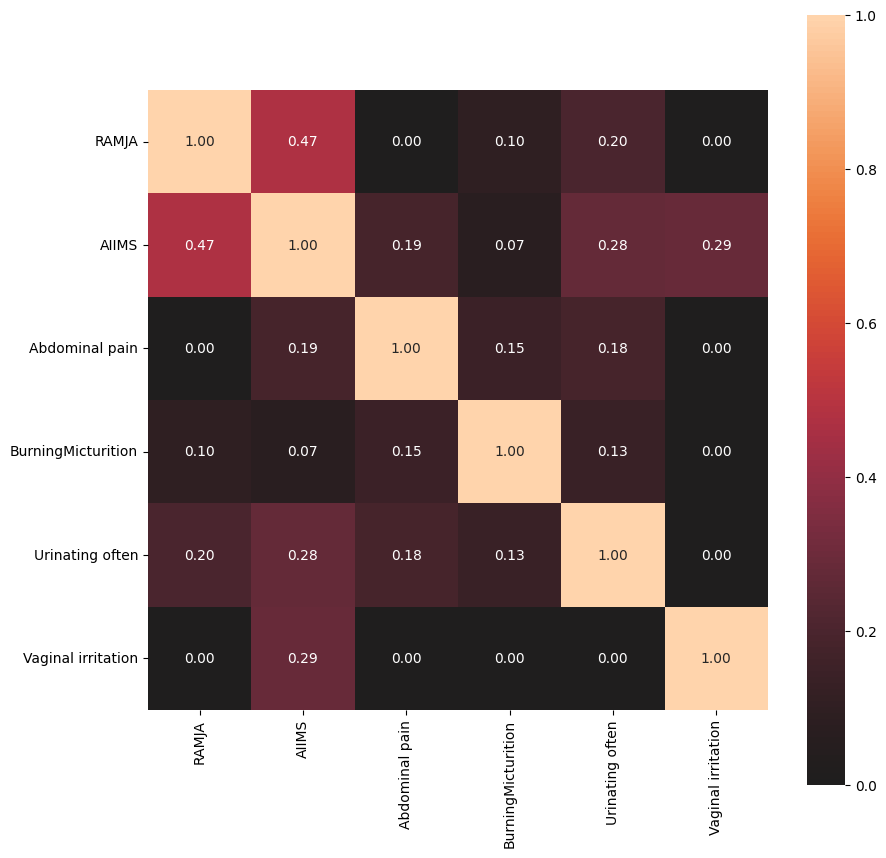

{'corr':                        RAMJA     AIIMS  Abdominal pain  BurningMicturition  \
 RAMJA               1.000000  0.473361        0.000000            0.097242   
 AIIMS               0.473361  1.000000        0.185866            0.068084   
 Abdominal pain      0.000000  0.185866        1.000000            0.147315   
 BurningMicturition  0.097242  0.068084        0.147315            1.000000   
 Urinating often     0.200524  0.279495        0.182122            0.133200   
 Vaginal irritation  0.000000  0.288348        0.000000            0.000000   
 
                     Urinating often  Vaginal irritation  
 RAMJA                      0.200524            0.000000  
 AIIMS                      0.279495            0.288348  
 Abdominal pain             0.182122            0.000000  
 BurningMicturition         0.133200            0.000000  
 Urinating often            1.000000            0.000000  
 Vaginal irritation         0.000000            1.000000  ,
 'ax': <Axes: >}

In [113]:
from dython.nominal import associations
associations(df_sym_corr, nominal_columns='all', figsize=(10,10) )

#### ................Finish.....................